In [17]:
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings
%matplotlib inline

## Install this on a new system
# nltk.download('punkt')
from nltk.tokenize import word_tokenize


warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')




## Get the overall info from the dataset


In [18]:
## Read the dataset from CSV file

city_df = pd.read_csv("textdata/LosAngeles-dataset.csv")



In [19]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13469 entries, 0 to 13468
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   coordinates                 13467 non-null  object 
 1   created_at                  13469 non-null  object 
 2   hashtags                    8023 non-null   object 
 3   media                       687 non-null    object 
 4   urls                        12824 non-null  object 
 5   favorite_count              13469 non-null  int64  
 6   id                          13469 non-null  int64  
 7   in_reply_to_screen_name     95 non-null     object 
 8   in_reply_to_status_id       28 non-null     float64
 9   in_reply_to_user_id         95 non-null     float64
 10  lang                        13469 non-null  object 
 11  place                       13466 non-null  object 
 12  possibly_sensitive          12962 non-null  object 
 13  retweet_count               134

In [20]:
city_df.head(5)

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name.1,user_statuses_count,user_time_zone,user_urls,user_verified
0,"-118.243,34.0522",Fri Mar 20 02:20:53 +0000 2020,corona coronamemes coronavirus coronavirusmeme...,NaN,https://www.instagram.com/p/B98EBPoAZDo/?igshi...,1,1240825611544920065,NaN,NaN,NaN,...,1064,984,68,Los Angeles,Tom Kiesche,TomKiesche,10392,NaN,https://linktr.ee/TomKiesche,False
1,"-117.58,33.88",Sat Mar 21 02:15:52 +0000 2020,NaN,NaN,NaN,0,1241186735213535232,NaN,NaN,NaN,...,104,1,6,"Corona, CA",Corona Weather,_CoronaCA,35097,NaN,NaN,False
2,"-117.89,33.8362",Fri Mar 20 18:24:21 +0000 2020,chillin lazy,NaN,https://www.instagram.com/p/B99yR1hgPey/?igshi...,0,1241068075425857541,NaN,NaN,NaN,...,372,2458,54,"Anaheim, CA",Blane Jeremy,IAmBlaneJeremy,21958,NaN,NaN,False
3,"-118.2192,33.9816",Fri Mar 20 14:10:00 +0000 2020,yorkie longcoatchihuahua,NaN,https://www.instagram.com/p/B99VEiSJF-9/?igshi...,0,1241004065276022785,NaN,NaN,NaN,...,94,1339,0,"Huntington Park, CA",Larry Leal,pochola,1319,NaN,https://www.instagram.com/larryleal/,False
4,"-117.566,33.8753",Fri Mar 20 04:13:12 +0000 2020,NaN,NaN,https://www.instagram.com/p/B98Q3-WFPCa/?igshi...,0,1240853875311214598,NaN,NaN,NaN,...,546,2392,6,"Los Angeles, CA",BIG CHINGS,BiGChinGSdotCOM,7655,NaN,http://www.BIGCHINGS.com,False


In [21]:
# ASSIGN Set dataset info 

# toronto_df.info()
# toronto_df.head(5)


## Create a dataframe with a column for tweets
#df_text = toronto_df['text']
# df_text = toronto_df[['text']].convert_dtypes(object,str)

df_text = city_df[['text']].convert_dtypes(object,str)
df_text['created_at'] = city_df[['created_at']].convert_dtypes(object,str)
df_text['place'] = city_df[['place']].convert_dtypes(object,str)
df_text['hashtags'] = city_df[['hashtags']].convert_dtypes(object,str)

# df_timebased_tweets = 
## Perhaps we need the hashtags too
# created_at	, hashtags,  place

#df_text = toronto_df[['hashtags','text']]

#df_text.info()
# df_text.head(10)            

In [22]:
df_text.head(10)    

,text,created_at,place,hashtags
0,Now I know why my cat has a daily routine. To ...,Fri Mar 20 02:20:53 +0000 2020,"Los Angeles, CA",corona coronamemes coronavirus coronavirusmeme...
1,"current weather in Corona: broken clouds, 58°F...",Sat Mar 21 02:15:52 +0000 2020,"Corona, CA",<NA>
2,Forced vacation? Social distancing? Unemployed...,Fri Mar 20 18:24:21 +0000 2020,"Anaheim, CA",chillin lazy
3,Corona buddies #yorkie #longcoatchihuahua @ Hu...,Fri Mar 20 14:10:00 +0000 2020,"Huntington Park, CA",yorkie longcoatchihuahua
4,CHINGS BRINGS..... I BRING YOU CORONA VIRUS!!!...,Fri Mar 20 04:13:12 +0000 2020,"Corona, CA",<NA>
5,Corona Virus shit is getting real 😂 thank you ...,Fri Mar 20 20:18:21 +0000 2020,"Los Angeles, CA",youtube
6,Staying busy. . . . . . . . . . . . . #corona...,Thu Mar 19 21:05:44 +0000 2020,"Los Angeles, CA",coronavirus corona quarantine selfquarantine s...
7,Quarantine 🏓 training ! Adding some kicks 💥. ...,Thu Mar 19 19:58:28 +0000 2020,"Los Angeles, CA",pingpong tabletennis fun pingponggirl paddle t...
8,Shanti at Corona Beach !! @ Corona Beach https...,Fri Mar 20 07:05:09 +0000 2020,"Corona, CA",<NA>
9,#runyoncanyon #corona #hike @ Runyon Canyon - ...,Fri Mar 20 20:04:27 +0000 2020,"Los Angeles, CA",runyoncanyon corona hike


## Cleaning the text Data

In [23]:
#1-Clean Emojis from text
def cleanEmoji(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

#2-CleanTweets function replaces non-text entities with space
def cleanTweets(text):
    text = re.sub(r'@[A-Za-z0-9]','',text, flags=re.MULTILINE)  # Remove @mentions
    text = re.sub(r'#','',text, flags=re.MULTILINE)              # Removing the # symbol
    text = re.sub(r'@','',text, flags=re.MULTILINE)              # Removing the # symbol
    text = re.sub(r'RT[\s]+','',text, flags=re.MULTILINE)        # Remove RT
    text = re.sub(r'https?:\/\/\S+','',text, flags=re.MULTILINE) # Remove the hyper link
    text = re.sub(r'http?:\/\/\S+','',text, flags=re.MULTILINE)  # Remove the hyper link

    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)

    # Note: remove special charactres and punctuations -
    text = re.sub(r'[^a-zA-Z# ]','',text, flags=re.MULTILINE)
    
    
    #text = re.sub('https', '', text, flags=re.MULTILINE)
    #text = re.sub('https', '', text, flags=re.MULTILINE)
    text = re.sub('urbanstreetphotography', '', text, flags=re.MULTILINE)
    text = re.sub('igstreet', '', text, flags=re.MULTILINE)   
    text = re.sub('cityscape', '', text, flags=re.MULTILINE)
    text = re.sub('streetphotographer', '', text, flags=re.MULTILINE)
    text = re.sub('urbanstreetphotogallery', '', text, flags=re.MULTILINE)
    text = re.sub('photodocumentary', '', text, flags=re.MULTILINE)
    text = re.sub('ig_street', '', text, flags=re.MULTILINE)
    text = re.sub('Covid', '', text, flags=re.MULTILINE)
    text = re.sub('COVID', '', text, flags=re.MULTILINE)
    text = re.sub('covid', '', text, flags=re.MULTILINE)
    text = re.sub('spicollective', '', text, flags=re.MULTILINE)
    text = re.sub('Spicollective', '', text, flags=re.MULTILINE)
    text = re.sub('lensculture', '', text, flags=re.MULTILINE)
    text = re.sub('Toronto', '', text, flags=re.MULTILINE)
    text = re.sub('Ontario', '', text, flags=re.MULTILINE)
    text = re.sub('will', '', text, flags=re.MULTILINE)
    text = re.sub('bnw', '', text, flags=re.MULTILINE)
    text = re.sub('bw', '', text, flags=re.MULTILINE)


    text = re.sub(r'\xc2\xb7','',text)  # Remove bullet points
    text = re.sub(r'\u2022','',text)  # Remove bullet points       
    # text = re.sub(r'https?:\/\/(www\.)?[-a-zA-Z0–9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0–9@:%_\+.~#?&//=]*)',
    #  '', text, flags=re.MULTILINE)          # Remove links that start with HTTP/HTTPS in the tweet
    # text = re.sub(r'[-a-zA-Z0–9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0–9@:%_\+.~#?&//=]*)',
    #  '', text, flags=re.MULTILINE)           # Remove other url links


    return text


In [24]:
# pass the text through cleantweet and removeEmoji functions
# s = df_text.iloc[[2]]
df_text['text'] = df_text['text'].apply(cleanTweets)
df_text['text'] = df_text['text'].apply(cleanEmoji)




In [25]:
df_text.head(2)

,text,created_at,place,hashtags
0,Now I know why my cat has a daily routine To k...,Fri Mar 20 02:20:53 +0000 2020,"Los Angeles, CA",corona coronamemes coronavirus coronavirusmeme...
1,current weather in Corona broken clouds F humi...,Sat Mar 21 02:15:52 +0000 2020,"Corona, CA",<NA>


# A- Sentence Level Analysis

## Start working on the contect and subject area

In [26]:
#create a function to get the subjectivity
def getSubjectivity(text): 
    return TextBlob(text).sentiment.subjectivity

#create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Create two new columns to add the sentiment and polarity
df_text['subjectivity'] = df_text['text'].apply(getSubjectivity)
df_text['polarity'] = df_text['text'].apply(getPolarity)

#Display the new dataset
df_text.head(10)


,text,created_at,place,hashtags,subjectivity,polarity
0,Now I know why my cat has a daily routine To k...,Fri Mar 20 02:20:53 +0000 2020,"Los Angeles, CA",corona coronamemes coronavirus coronavirusmeme...,0.500000,-0.250000
1,current weather in Corona broken clouds F humi...,Sat Mar 21 02:15:52 +0000 2020,"Corona, CA",<NA>,0.400000,-0.200000
2,Forced vacation Social distancing Unemployed C...,Fri Mar 20 18:24:21 +0000 2020,"Anaheim, CA",chillin lazy,0.413333,0.036667
3,Corona buddies yorkie longcoatchihuahua Hunti...,Fri Mar 20 14:10:00 +0000 2020,"Huntington Park, CA",yorkie longcoatchihuahua,0.000000,0.000000
4,CHINGS BRINGS I BRING YOU CORONA VIRUS Be SCAR...,Fri Mar 20 04:13:12 +0000 2020,"Corona, CA",<NA>,1.000000,-0.800000
5,Corona Virus shit is getting real thank you i...,Fri Mar 20 20:18:21 +0000 2020,"Los Angeles, CA",youtube,0.487222,0.160000
6,Staying busy coronavirus corona quarantine sel...,Thu Mar 19 21:05:44 +0000 2020,"Los Angeles, CA",coronavirus corona quarantine selfquarantine s...,0.300000,0.100000
7,Quarantine training Adding some kicks p...,Thu Mar 19 19:58:28 +0000 2020,"Los Angeles, CA",pingpong tabletennis fun pingponggirl paddle t...,0.200000,0.300000
8,Shanti at Corona Beach Corona Beach,Fri Mar 20 07:05:09 +0000 2020,"Corona, CA",<NA>,0.000000,0.000000
9,runyoncanyon corona hike Runyon Canyon Los A...,Fri Mar 20 20:04:27 +0000 2020,"Los Angeles, CA",runyoncanyon corona hike,0.000000,0.000000


In [27]:
# df_text.head(10)
df_text.to_csv("textdata/myexportfile_losangeles.csv")

## Make a WordCloud chart -word frequency map

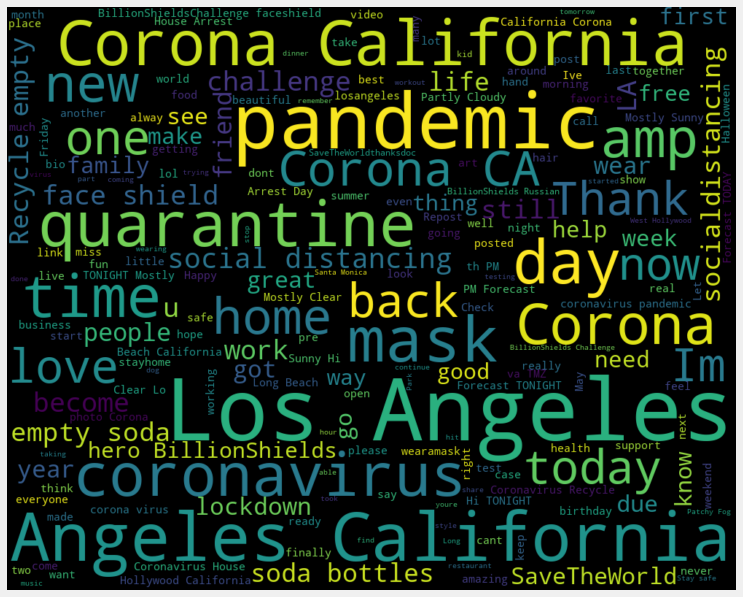

In [28]:
# plot outcome using word cloud
# visualize the most frequency used words
allWords = ' '.join(twts for twts in df_text['text'])

wordCloud = WordCloud(width=1000, height=800, random_state=21,max_font_size=119).generate(allWords)

plt.figure(figsize=(20,10))
plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()


## Positive and Negative Sentiments

In [29]:
#Create a function to compute the negative, nuetral, and positive sentiment

def getSentAnalysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

# Add column analysis and add a label such as positive-negative-neutral to each tweet
df_text['analysis'] = df_text['polarity'].apply(getSentAnalysis)

#df_text


## All Negative Tweets

In [30]:
#print all of the negative tweets
j=1
sortedDF_text = df_text.sort_values(by=['polarity'])
# for i in range(0, sortedDF_text.shape[0]):
#     if (sortedDF_text['analysis'][i] == 'Negative'):
#         print(str(j)+ ')' + sortedDF_text['text'][i])
#         # print()  #to print uncomment
#         j = j+1

## All Positive Tweets

In [31]:
#print all of the Positive tweets
j=1
sortedDF_text = df_text.sort_values(by=['polarity'])
# for i in range(0, sortedDF_text.shape[0]):
#     if (sortedDF_text['analysis'][i] == 'Positive'):
#         print(str(j)+ ')' + sortedDF_text['text'][i])
#         print()
#         j = j+1

## Scatter pLot - map the postitive-negative distribution

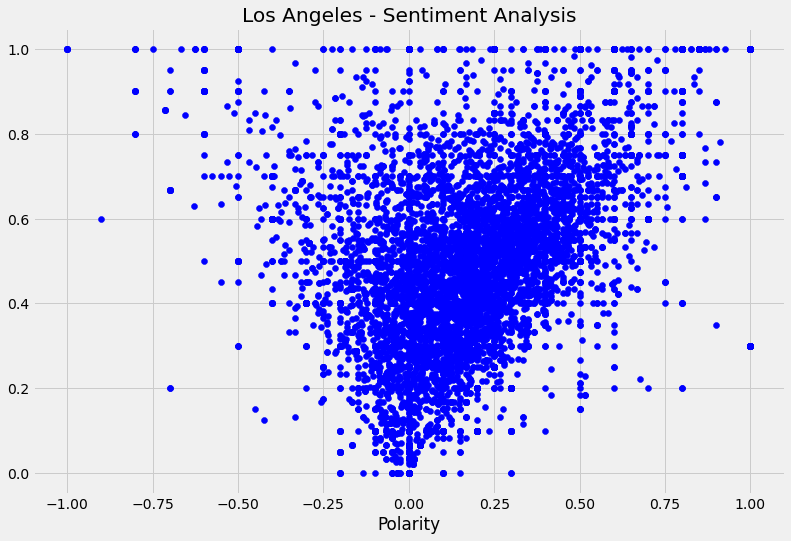

In [32]:
# plot the polarity and subjectivity
plt.figure(figsize=(12,8))
for i in range(0,df_text.shape[0]):
    plt.scatter(df_text['polarity'][i],df_text['subjectivity'][i], color='Blue')

plt.title('Los Angeles - Sentiment Analysis')
plt.xlabel('Subjectivity')
plt.xlabel('Polarity')
plt.show()

## Overall picture: Positive, Negative, Neutral


In [17]:
#Get the percentages: Positive, Negative, Neutral

## Percentage of Positive Tweets
ptweets = df_text[df_text.analysis == 'Positive']
ptweets = ptweets ['text']
positivetweets = round ((ptweets.shape[0] /df_text.shape[0]) *100,1)
print (f"--> percentage of positive tweets: {positivetweets} %")


--> percentage of positive tweets: 52.3 %


In [18]:
# Get the percentage of negative tweets
ntweets = df_text[df_text.analysis == 'Negative']
ntweets = ntweets['text']

## Percentage of Negative Tweets

negativetweets = round( (ntweets.shape[0] / df_text.shape[0]*100),1)
print (f"--> percentage of negative tweets: {negativetweets} %")


--> percentage of negative tweets: 16.9 %


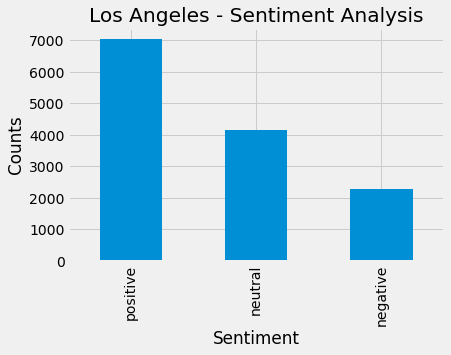

In [66]:
#Show the value counts
df_text['analysis'].value_counts()

#plot and visualize the counts
plt.title('Los Angeles - Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df_text['analysis'].value_counts().plot(kind='bar')

plt.show('Sentiment')



# B- Word Level Analysis

## B.1 Define Tokenized Tweets

In [67]:
# import the stopword library

from nltk.corpus import stopwords
# nltk.download('stopwords')  #need to run on a new machine

import ast  #used for literal_eval



In [68]:
import nltk
##  Add a new column "tokenized_tw" to the dataset and include the tokenized tweets
##  split content into words

df_text['tokenized_tw'] = df_text.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
# df_text['tokenized_tw'] = df_text['tokenized_tw'].tolist()

In [69]:
df_text.head(1)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw,date,month
0,now i know why my cat has a daily routine to k...,fri mar 20 02:20:53 +0000 2020,los angeles,corona coronamemes coronavirus coronavirusmeme...,0.5,-0.25,negative,"[now, i, know, why, my, cat, has, a, daily, ro...",2020-03-20 02:20:53,3


In [70]:
# convert all fields to lower case
df_text = df_text.apply(lambda x: x.astype(str).str.lower())
df_text.head(1)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw,date,month
0,now i know why my cat has a daily routine to k...,fri mar 20 02:20:53 +0000 2020,los angeles,corona coronamemes coronavirus coronavirusmeme...,0.5,-0.25,negative,"['now', 'i', 'know', 'why', 'my', 'cat', 'has'...",2020-03-20 02:20:53,3


## B.2 Apply Filters - Find/Remove Stopwords

In [71]:
# TODO double check the list of stop words, might need to use a different function later
# stop_words = stopwords.words('english')
# check what is included here 
# stop_words

In [72]:
df_text.head(2)
type(df_text['tokenized_tw'])

pandas.core.series.Series

In [73]:
## Apply filter for Stop Words { in , is, the , a, ... }
def remove_stopwords(TokenList):
  
    # Identify StopWords - get them from stopwords
    stop_words = stopwords.words('english')
    
    # convert string value to a list
    if isinstance(TokenList, str):
        TokenList = ast.literal_eval(TokenList)
 
        # TokenList = TokenList.split(",")
        for i, key in enumerate(TokenList):      
            if (key in stop_words):
                TokenList [i] = ''  
    
    return TokenList

          
nRecords = df_text['tokenized_tw'].count()
# nRecords = 3

# if the tokenized column is string change it to list
for x in range(nRecords):
    if (isinstance(df_text['tokenized_tw'][x],str)):
        # tokenListHere = df_text['tokenized_tw'][0].split(",")
        df_text['tokenized_tw'][x] = remove_stopwords(df_text['tokenized_tw'][x])





In [74]:
# Remove 1 letter tokens
# df_text['tokenized_tw'] = df_text['tokenized_tw'].apply(lambda x: [item for item in str(x).split() if len(x) > 2])

df_text.head(2)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw,date,month
0,now i know why my cat has a daily routine to k...,fri mar 20 02:20:53 +0000 2020,los angeles,corona coronamemes coronavirus coronavirusmeme...,0.5,-0.25,negative,"[, , know, , , cat, , , daily, routine, , keep...",2020-03-20 02:20:53,3
1,current weather in corona broken clouds f humi...,sat mar 21 02:15:52 +0000 2020,corona,<na>,0.4,-0.2,negative,"[current, weather, , corona, broken, clouds, f...",2020-03-21 02:15:52,3


## B.2 Apply Filters - stemming words

In [75]:
#Stemming reduces words to their root or base.
from nltk.stem.porter import PorterStemmer

In [76]:
# stemming of words
def applyporter(TokenList):
    # create an object for stemming   
    porterstemmer = PorterStemmer()
    
    # TokenList = ast.literal_eval(TokenList)
    if isinstance(TokenList, str):
         TokenList = TokenList.split(",")

    for i, key in enumerate(TokenList):            
            TokenList [i] = porterstemmer.stem(key)                       
        
    return TokenList
# tokens = word_tokenize(text)



nRecords = df_text['tokenized_tw'].count()
# apply porterstemmer on tokens
for x in range(nRecords-1):
    df_text['tokenized_tw'][x] = applyporter(df_text['tokenized_tw'][x])


In [77]:
df_text.head(2)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw,date,month
0,now i know why my cat has a daily routine to k...,fri mar 20 02:20:53 +0000 2020,los angeles,corona coronamemes coronavirus coronavirusmeme...,0.5,-0.25,negative,"[, , know, , , cat, , , daili, routin, , keep,...",2020-03-20 02:20:53,3
1,current weather in corona broken clouds f humi...,sat mar 21 02:15:52 +0000 2020,corona,<na>,0.4,-0.2,negative,"[current, weather, , corona, broken, cloud, f,...",2020-03-21 02:15:52,3


## Return the cleaned data into a sentence format

In [78]:
## combine word into a single sentence
for  i in range(nRecords):
    if isinstance(df_text['tokenized_tw'][i],list):
        df_text['tokenized_tw'][i] = " ".join(df_text['tokenized_tw'][i])


df_text.head(10)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw,date,month
0,now i know why my cat has a daily routine to k...,fri mar 20 02:20:53 +0000 2020,los angeles,corona coronamemes coronavirus coronavirusmeme...,0.5,-0.25,negative,know cat daili routin keep sanewhat du...,2020-03-20 02:20:53,3
1,current weather in corona broken clouds f humi...,sat mar 21 02:15:52 +0000 2020,corona,<na>,0.4,-0.2,negative,current weather corona broken cloud f humid w...,2020-03-21 02:15:52,3
2,forced vacation social distancing unemployed c...,fri mar 20 18:24:21 +0000 2020,anaheim,chillin lazy,0.4133333333333333,0.0366666666666666,positive,forc vacat social distanc unemploy corona viru...,2020-03-20 18:24:21,3
3,corona buddies yorkie longcoatchihuahua hunti...,fri mar 20 14:10:00 +0000 2020,huntington park,yorkie longcoatchihuahua,0.0,0.0,neutral,corona buddi yorki longcoatchihuahua huntingto...,2020-03-20 14:10:00,3
4,chings brings i bring you corona virus be scar...,fri mar 20 04:13:12 +0000 2020,corona,<na>,1.0,-0.7999999999999999,negative,ching bring bring corona viru scare bit...,2020-03-20 04:13:12,3
5,corona virus shit is getting real thank you i...,fri mar 20 20:18:21 +0000 2020,los angeles,youtube,0.4872222222222222,0.16,positive,corona viru shit get real thank iamcardib ...,2020-03-20 20:18:21,3
6,staying busy coronavirus corona quarantine sel...,thu mar 19 21:05:44 +0000 2020,los angeles,coronavirus corona quarantine selfquarantine s...,0.3,0.1,positive,stay busi coronaviru corona quarantin selfquar...,2020-03-19 21:05:44,3
7,quarantine training adding some kicks p...,thu mar 19 19:58:28 +0000 2020,los angeles,pingpong tabletennis fun pingponggirl paddle t...,0.2,0.3,positive,quarantin train ad kick pingpong tabletenni f...,2020-03-19 19:58:28,3
8,shanti at corona beach corona beach,fri mar 20 07:05:09 +0000 2020,corona,<na>,0.0,0.0,neutral,shanti corona beach corona beach,2020-03-20 07:05:09,3
9,runyoncanyon corona hike runyon canyon los a...,fri mar 20 20:04:27 +0000 2020,los angeles,runyoncanyon corona hike,0.0,0.0,neutral,runyoncanyon corona hike runyon canyon lo ange...,2020-03-20 20:04:27,3


## Create a WordCloud from cleaned tweets


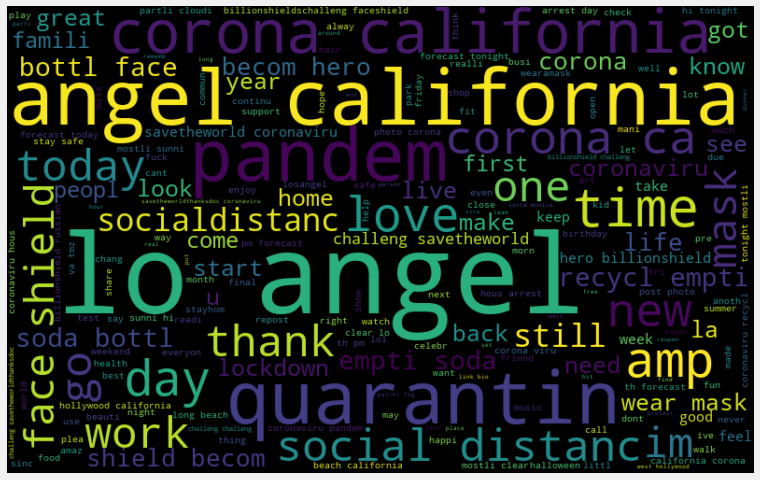

In [79]:
# visualize the most frequency used words using wordcloud

allWords = ' '.join(twts for twts in df_text['tokenized_tw'])

wordCloud = WordCloud(width=800, height=500, random_state=21,max_font_size=119).generate(allWords)

# size the plt object
plt.figure(figsize=(19,8))
plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

## Consider Location and Time in analysis

In [80]:

df_text.groupby(['place']).count


<bound method DataFrameGroupBy.count of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x0000012EA3F144F0>>

In [81]:
from datetime import datetime
from dateutil.parser import parse


In [82]:
#create a new column for data only
df_text['date'] = df_text['created_at']

# Add a new column for date and convert created_at field
for x in range(nRecords):
    # return date as Series
    df_text['date'][x] = datetime.strptime(df_text['created_at'][x],'%a %b %d %H:%M:%S +0000 %Y')
    # return date as a string
    # df_text['date'][x] = datetime.strftime(datetime.strptime(df_text['created_at'][x],'%a %b %d %H:%M:%S +0000 %Y'), '%Y-%m-%d %H:%M:%S')
  
# Extract month from the data variable, Add a new column
df_text['month']  = pd.DatetimeIndex(df_text['date']).month


In [83]:
df_text. head(3)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw,date,month
0,now i know why my cat has a daily routine to k...,fri mar 20 02:20:53 +0000 2020,los angeles,corona coronamemes coronavirus coronavirusmeme...,0.5,-0.25,negative,know cat daili routin keep sanewhat du...,2020-03-20 02:20:53,3
1,current weather in corona broken clouds f humi...,sat mar 21 02:15:52 +0000 2020,corona,<na>,0.4,-0.2,negative,current weather corona broken cloud f humid w...,2020-03-21 02:15:52,3
2,forced vacation social distancing unemployed c...,fri mar 20 18:24:21 +0000 2020,anaheim,chillin lazy,0.4133333333333333,0.0366666666666666,positive,forc vacat social distanc unemploy corona viru...,2020-03-20 18:24:21,3


## Data preparation for further visualizations

In [84]:

# Group by place
# placesRecords = df_text.groupby(['place'])

# get the first item in each place group
# placesRecords.first()


# remove ontario from place column
lista = df_text.place.str.split(",",expand=True)
df_text['place'] = lista [0]


# convert the polarity and subjectivity values to numbers
df_text["polarity"] = pd.to_numeric(df_text['polarity'])
df_text["subjectivity"] = pd.to_numeric(df_text['subjectivity'])


# create new dataframes for further visualizations
# get number of tweets from each place
df_region_sentiment = df_text.groupby('place', as_index=False)['polarity'].mean()

# get the polarities and months information
df_time_sentiment = df_text.groupby('month', as_index=False)['polarity'].mean()





In [85]:
df_region_sentiment.head(5)
# df_region_sentiment.sort_values(by='polarity')

,place,polarity
0,<na>,0.291111
1,agoura hills,0.268603
2,alhambra,-0.058815
3,altadena,0.173019
4,anaheim,0.119138


<AxesSubplot:title={'center':'LosAngeles - Sentiment Polarity based on Region'}, ylabel='place'>

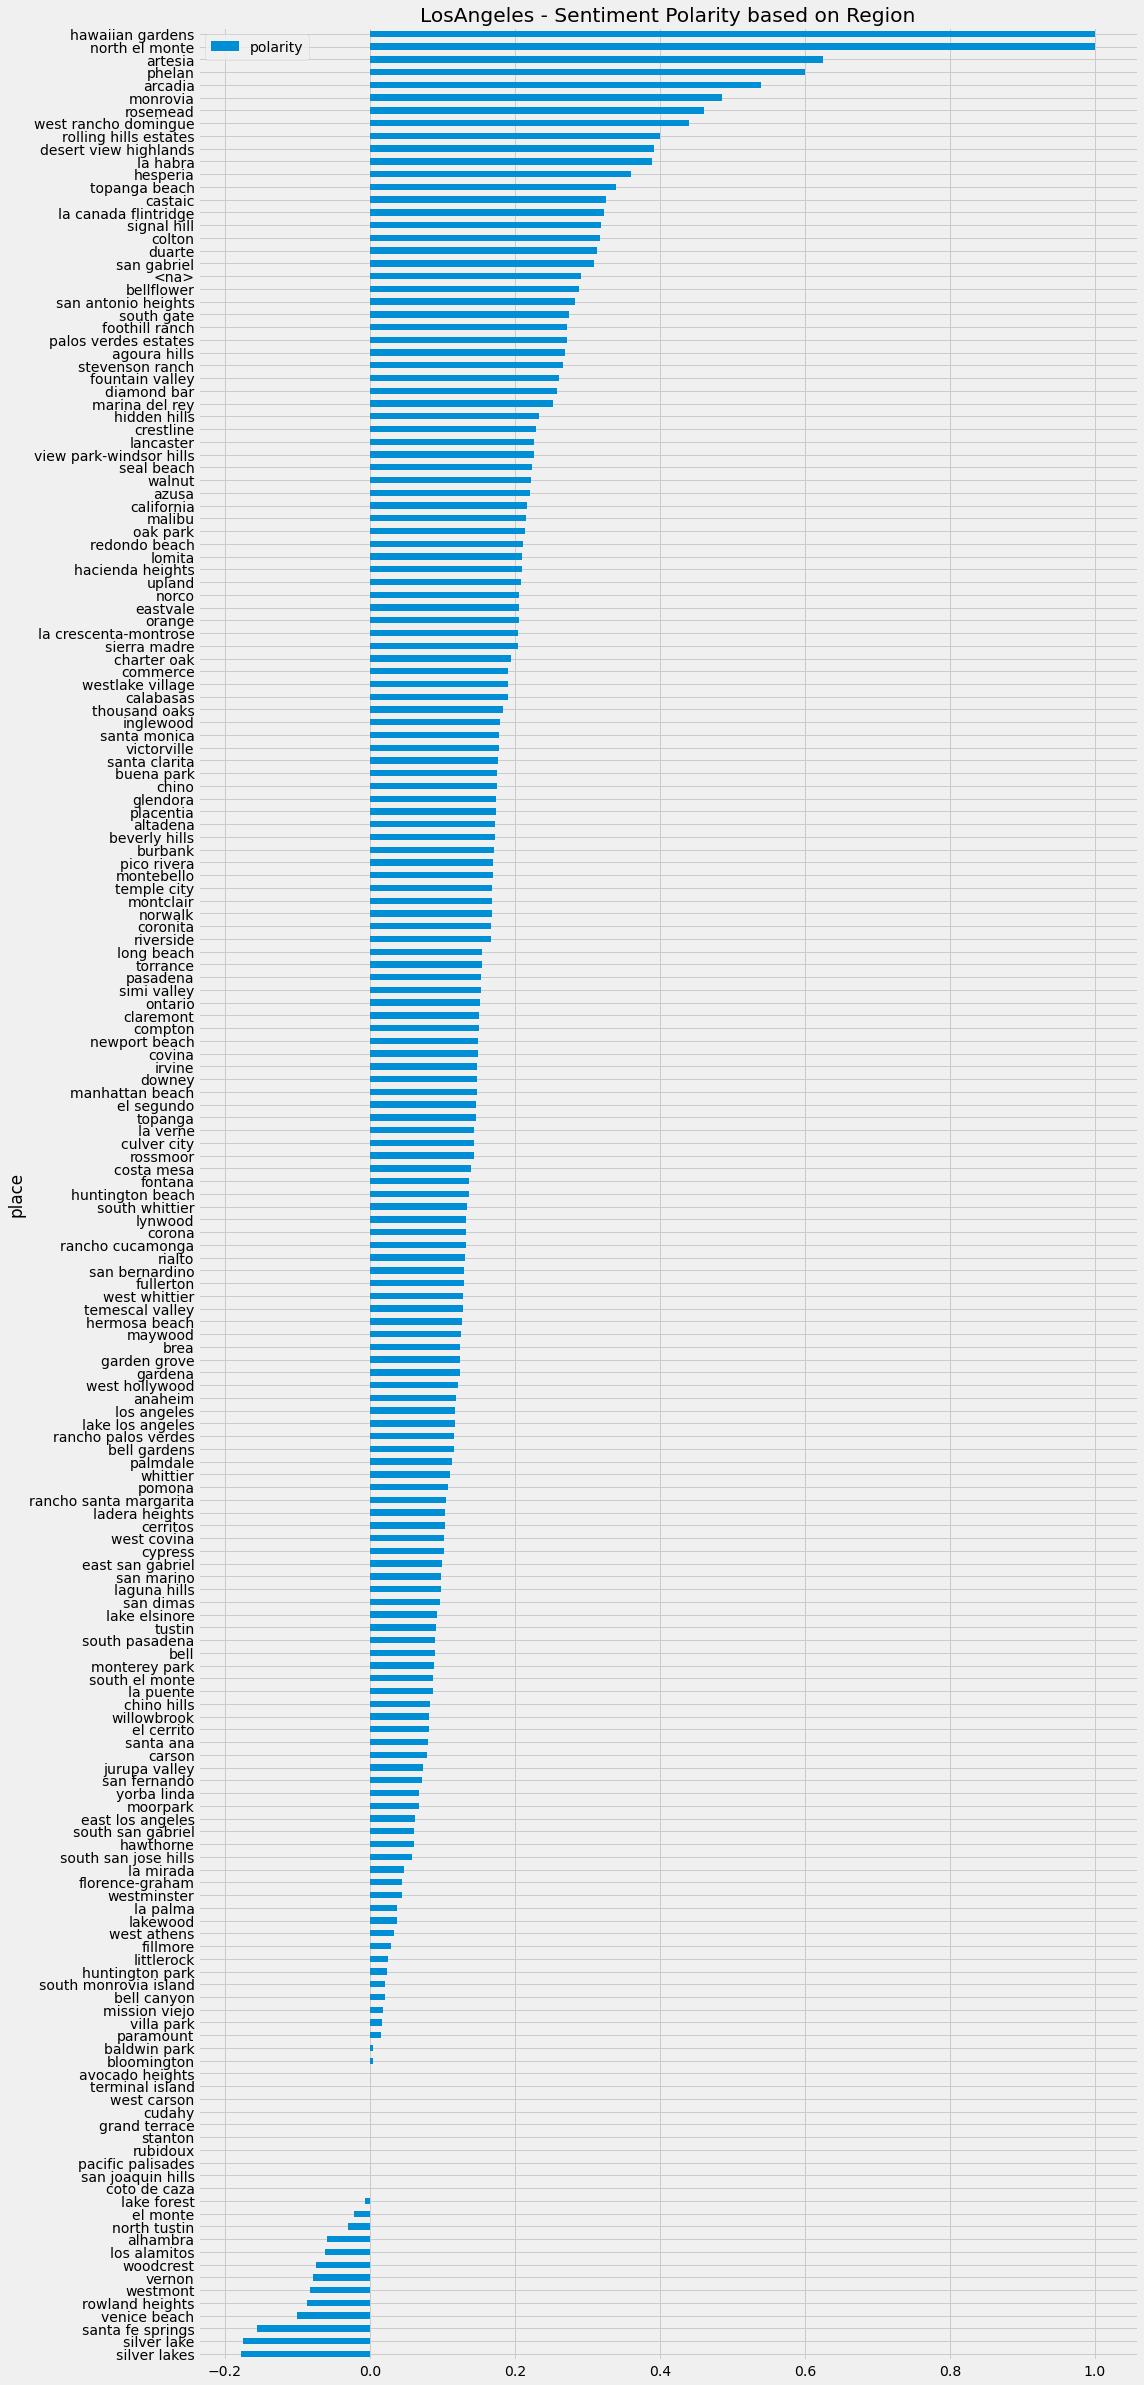

In [86]:
# Chart sentiments based on regions

#df_region_sentiment["polarity"] = pd.to_numeric(df_region_sentiment['polarity'])
df_region_sentiment.sort_values(by='polarity').plot.barh(x='place', y='polarity', rot=0, figsize=(15, 40), title='LosAngeles - Sentiment Polarity based on Region')





In [87]:
df_time_sentiment.head(5)

,month,polarity
0,3,0.090723
1,4,0.117430
2,5,0.127314
3,6,0.137807
4,7,0.149788


<AxesSubplot:title={'center':'Los Angeles - Monthly Sentiment Progression'}, xlabel='month'>

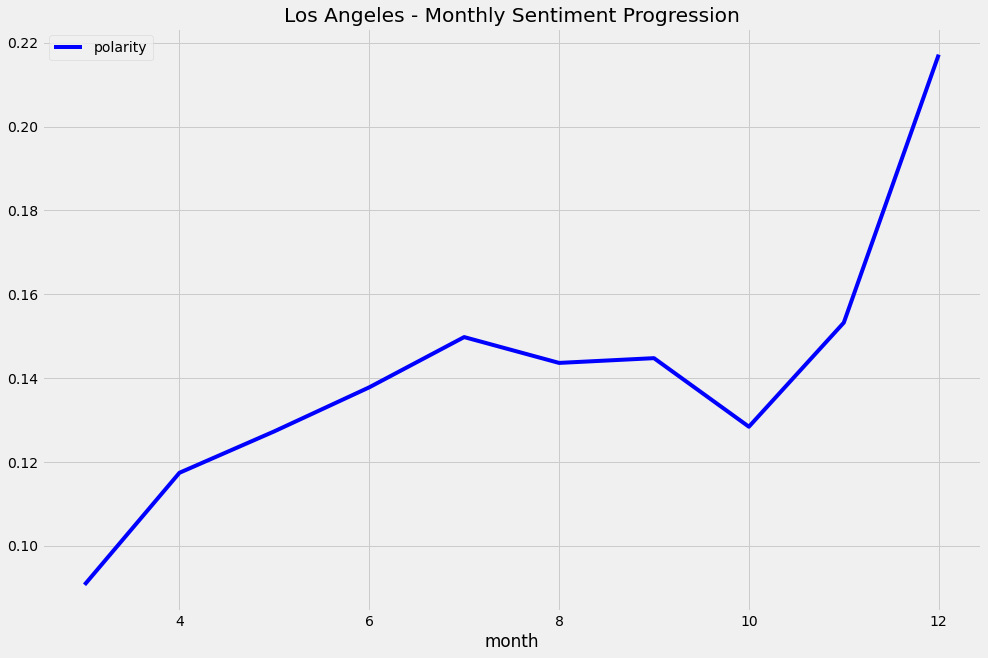

In [88]:
# Chart sentiments based on regions

df_time_sentiment.sort_values(by='month').plot.line(x='month', y='polarity', rot=0, figsize=(15, 10), color="blue",title='Los Angeles - Monthly Sentiment Progression')


## Extract Hashtags

In [89]:
df_text.head(10)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw,date,month
0,now i know why my cat has a daily routine to k...,fri mar 20 02:20:53 +0000 2020,los angeles,corona coronamemes coronavirus coronavirusmeme...,0.500000,-0.250000,negative,know cat daili routin keep sanewhat du...,2020-03-20 02:20:53,3
1,current weather in corona broken clouds f humi...,sat mar 21 02:15:52 +0000 2020,corona,<na>,0.400000,-0.200000,negative,current weather corona broken cloud f humid w...,2020-03-21 02:15:52,3
2,forced vacation social distancing unemployed c...,fri mar 20 18:24:21 +0000 2020,anaheim,chillin lazy,0.413333,0.036667,positive,forc vacat social distanc unemploy corona viru...,2020-03-20 18:24:21,3
3,corona buddies yorkie longcoatchihuahua hunti...,fri mar 20 14:10:00 +0000 2020,huntington park,yorkie longcoatchihuahua,0.000000,0.000000,neutral,corona buddi yorki longcoatchihuahua huntingto...,2020-03-20 14:10:00,3
4,chings brings i bring you corona virus be scar...,fri mar 20 04:13:12 +0000 2020,corona,<na>,1.000000,-0.800000,negative,ching bring bring corona viru scare bit...,2020-03-20 04:13:12,3
5,corona virus shit is getting real thank you i...,fri mar 20 20:18:21 +0000 2020,los angeles,youtube,0.487222,0.160000,positive,corona viru shit get real thank iamcardib ...,2020-03-20 20:18:21,3
6,staying busy coronavirus corona quarantine sel...,thu mar 19 21:05:44 +0000 2020,los angeles,coronavirus corona quarantine selfquarantine s...,0.300000,0.100000,positive,stay busi coronaviru corona quarantin selfquar...,2020-03-19 21:05:44,3
7,quarantine training adding some kicks p...,thu mar 19 19:58:28 +0000 2020,los angeles,pingpong tabletennis fun pingponggirl paddle t...,0.200000,0.300000,positive,quarantin train ad kick pingpong tabletenni f...,2020-03-19 19:58:28,3
8,shanti at corona beach corona beach,fri mar 20 07:05:09 +0000 2020,corona,<na>,0.000000,0.000000,neutral,shanti corona beach corona beach,2020-03-20 07:05:09,3
9,runyoncanyon corona hike runyon canyon los a...,fri mar 20 20:04:27 +0000 2020,los angeles,runyoncanyon corona hike,0.000000,0.000000,neutral,runyoncanyon corona hike runyon canyon lo ange...,2020-03-20 20:04:27,3


In [90]:
## Extract Hashtags
positiveHashtags = []
negativeHashtags = []


for i in range(nRecords):
    if (df_text['analysis'][i]=='positive'):
        #positive sentiment  
        if ('<na>' in df_text['hashtags'][i]):      
            continue  
        else:
            splitList = str(df_text['hashtags'][i]).split(" ")            
            positiveHashtags = positiveHashtags + splitList
    elif (df_text['analysis'][i]=='negative'):
        #negative sentiment
        if ('<na>' in df_text['hashtags'][i]):  
            continue
        else:    
            splitList = str(df_text['hashtags'][i]).split(" ")    
            negativeHashtags = negativeHashtags + splitList       
    else:
        # neutral sentiment
        continue


# positive_hashtags = df_allHashtags['hashtags']




In [91]:
# type(negativeHashtags)
# print (negativeHashtags)

#Clear up the list from unwanted hashtags
commercialHashtags = ["streetphotographer", "urbanstreetphotography","urbanstreetphotogallery","photodocumentary"
,"spicollective","cityscape","urbansteetphotogallery","ig_street","bnw","bw","lensculture","bollywood","entertainment","urbanstreetphotogallery"]


for element in negativeHashtags:
    if element in commercialHashtags:
        negativeHashtags.remove(element)

for element in positiveHashtags:
    if element in commercialHashtags:
        positiveHashtags.remove(element)        

In [92]:
# populate the hashtags based on frequency and display the top 15
freq = nltk.FreqDist(negativeHashtags)
df_NegativeHashtags = pd.DataFrame( { 'Hashtag': list(freq.keys()),
                    'count':list(freq.values())})
df_NegativeHashtags = df_NegativeHashtags.nlargest(columns='count', n=30)                    
df_NegativeHashtags.head(20) 

,Hashtag,count
2,coronavirus,436
449,savetheworld,324
155,covid19,283
501,billionshieldschallenge,268
451,billionshields,265
923,faceshield,213
0,corona,107
338,covid,103
495,bottles2shields,98
1520,masks4all,89


<AxesSubplot:title={'center':'Los Angeles - Negative Tweets - Hashtags'}, ylabel='Hashtag'>

<Figure size 1080x720 with 0 Axes>

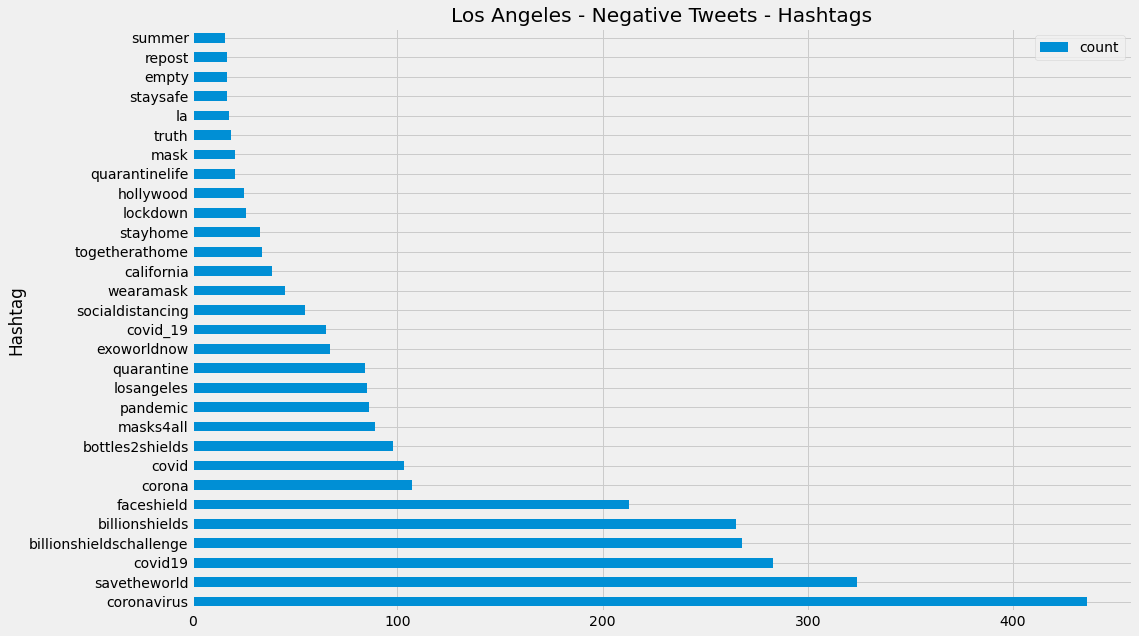

In [93]:
# display topc 20 negative tweets

plt.figure(figsize=(15,10))
df_NegativeHashtags.plot.barh(x='Hashtag', y='count', rot=0, figsize=(15, 10), title='Los Angeles - Negative Tweets - Hashtags')


In [94]:
# populate the hashtags based on frequency and display the top 15
freq = nltk.FreqDist(positiveHashtags)
df_PositiveHashtags = pd.DataFrame( { 'Hashtag': list(freq.keys()),
                    'count':list(freq.values())})
df_PositiveHashtags = df_PositiveHashtags.nlargest(columns='count', n=30)       


df_PositiveHashtags.head(20) 

                 

,Hashtag,count
47,covid19,875
3,coronavirus,481
5,quarantine,376
4,corona,365
201,losangeles,270
2964,wearamask,245
416,pandemic,232
28,socialdistancing,226
48,covid,221
142,love,177


<AxesSubplot:title={'center':'Los Angeles - Positive Tweets - Hashtags'}, ylabel='Hashtag'>

<Figure size 1080x720 with 0 Axes>

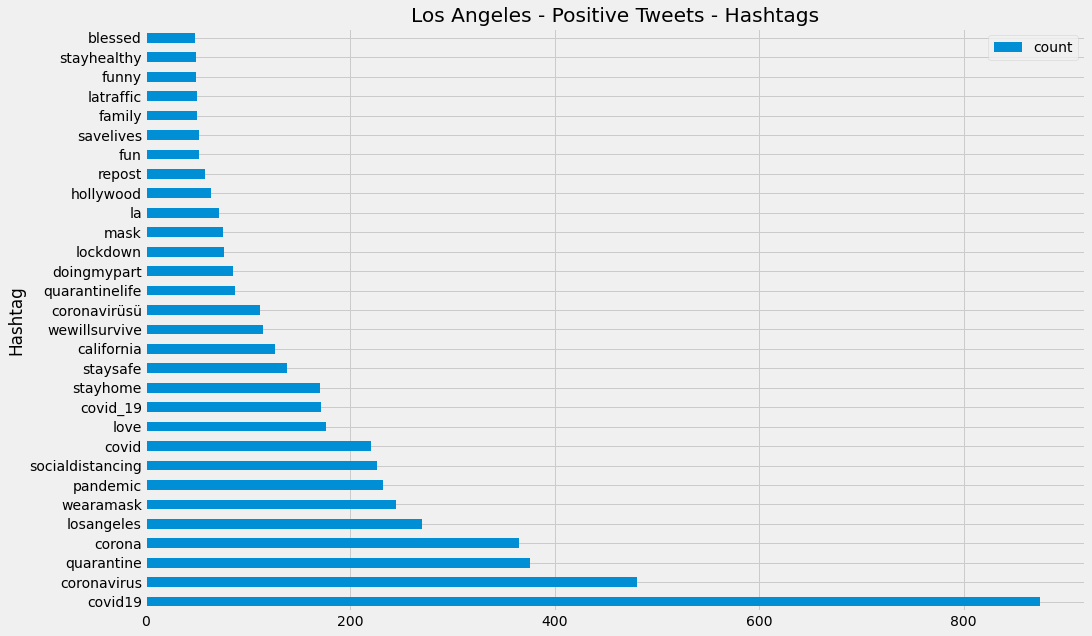

In [95]:
# display topc 20 positive tweets
plt.figure(figsize=(15,10))
df_PositiveHashtags.plot.barh(x='Hashtag', y='count', rot=0, figsize=(15, 10), title='Los Angeles - Positive Tweets - Hashtags')

In [96]:
# df_text['strTweets'] = df_text['text'].to_string()
# df_text.head()

In [97]:
# type(df_text['strTweets'])
# type(df_text['text'])

#Create a function to compute the negative, nuetral, and positive sentiment

def getSentAnalysis(score):
    if "negative":
        return 0 
    elif 'positive':
        return 1
    else:
        return 0

# Add column analysis and add a label such as positive-negative-neutral to each tweet
df_text['label'] = df_text['analysis'].apply(getSentAnalysis)


In [98]:
df_text.head()

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw,date,month,label
0,now i know why my cat has a daily routine to k...,fri mar 20 02:20:53 +0000 2020,los angeles,corona coronamemes coronavirus coronavirusmeme...,0.500000,-0.250000,negative,know cat daili routin keep sanewhat du...,2020-03-20 02:20:53,3,0
1,current weather in corona broken clouds f humi...,sat mar 21 02:15:52 +0000 2020,corona,<na>,0.400000,-0.200000,negative,current weather corona broken cloud f humid w...,2020-03-21 02:15:52,3,0
2,forced vacation social distancing unemployed c...,fri mar 20 18:24:21 +0000 2020,anaheim,chillin lazy,0.413333,0.036667,positive,forc vacat social distanc unemploy corona viru...,2020-03-20 18:24:21,3,0
3,corona buddies yorkie longcoatchihuahua hunti...,fri mar 20 14:10:00 +0000 2020,huntington park,yorkie longcoatchihuahua,0.000000,0.000000,neutral,corona buddi yorki longcoatchihuahua huntingto...,2020-03-20 14:10:00,3,0
4,chings brings i bring you corona virus be scar...,fri mar 20 04:13:12 +0000 2020,corona,<na>,1.000000,-0.800000,negative,ching bring bring corona viru scare bit...,2020-03-20 04:13:12,3,0
